In [44]:
#Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
##########################################################
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
##########################################################
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_excel(r'C:\Users\LENOVO\Desktop\hilal\online_retail_II.xlsx',
                sheet_name = "Year 2010-2011")
df = df1.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


In [3]:
##################################################
# DATA PREPARİNG 
##################################################
#bring bills except for return bills.
df = df[~df["Invoice"].str.contains("C", na=False)] 
df = df[(df['Quantity'] > 0)]
df.dropna(inplace=True)
df["TotalPrice"] = df["Quantity"] * df["Price"]

cltv_df = df.groupby('Customer ID').agg({'Invoice': lambda x: len(x),
                                         'Quantity': lambda x: x.sum(),
                                         'TotalPrice': lambda x: x.sum()})

cltv_df.columns = ['total_transaction', 'total_unit', 'total_price']

cltv_df.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12346.00000,1,74215,77183.60000
12347.00000,182,2458,4310.00000
12348.00000,31,2341,1797.24000
12349.00000,73,631,1757.55000
12350.00000,17,197,334.40000


In [4]:
##################################################
# 1. Calculate Average Order Value
##################################################
# Average_Order_Value = Total_Revenue / Total_Number_of_Orders

cltv_df.shape[0]

cltv_df['avg_order_value'] = cltv_df['total_price'] / cltv_df['total_transaction']#bir sipariş başına bırakılan gelir
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value
Customer ID,,,,
12346.00000,1,74215,77183.60000,77183.60000
12347.00000,182,2458,4310.00000,23.68132
12348.00000,31,2341,1797.24000,57.97548
12349.00000,73,631,1757.55000,24.07603
12350.00000,17,197,334.40000,19.67059


In [6]:
##################################################
# 2. Calculate Purchase Frequency
##################################################
# Purchase_Frequency =  Total_Number_of_Orders / Total_Number_of_Customers

cltv_df["purchase_frequency"] = cltv_df['total_transaction'] / cltv_df.shape[0]
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency
Customer ID,,,,,
12346.00000,1,74215,77183.60000,77183.60000,0.00023
12347.00000,182,2458,4310.00000,23.68132,0.04195
12348.00000,31,2341,1797.24000,57.97548,0.00714
12349.00000,73,631,1757.55000,24.07603,0.01682
12350.00000,17,197,334.40000,19.67059,0.00392


In [8]:
##################################################
# 3. Calculate Repeat Rate and Churn Rate
##################################################
# Churn_Rate = 1 - Repeat_Rate

repeat_rate = cltv_df[cltv_df.total_transaction > 1].shape[0] / cltv_df.shape[0]
churn_rate = 1 - repeat_rate

In [9]:
##################################################
# 4. Calculate Profit Margin(kar oranı)
##################################################

cltv_df['profit_margin'] = cltv_df['total_price'] * 0.05 #toplam fiyatın karla çarpımı kar oranını verir
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin
Customer ID,,,,,,
12346.00000,1,74215,77183.60000,77183.60000,0.00023,3859.18000
12347.00000,182,2458,4310.00000,23.68132,0.04195,215.50000
12348.00000,31,2341,1797.24000,57.97548,0.00714,89.86200
12349.00000,73,631,1757.55000,24.07603,0.01682,87.87750
12350.00000,17,197,334.40000,19.67059,0.00392,16.72000


In [38]:
##################################################
# 5. Calculate Customer Lifetime Value 
##################################################

cltv_df['CV'] = (cltv_df['avg_order_value'] * cltv_df["purchase_frequency"]) / churn_rate

cltv_df['CLTV'] = cltv_df['CV'] * cltv_df['profit_margin']

cltv_df.sort_values("CLTV", ascending=False)
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,CV,CLTV,SCALED_CLTV,segment
Customer ID,,,,,,,,,,
12346.00000,1,74215,77183.60000,77183.60000,0.00023,3859.18000,1071.99444,4137019.52011,8.51156,A
12347.00000,182,2458,4310.00000,23.68132,0.04195,215.50000,59.86111,12900.06944,1.02342,A
12348.00000,31,2341,1797.24000,57.97548,0.00714,89.86200,24.96167,2243.10529,1.00407,A
12349.00000,73,631,1757.55000,24.07603,0.01682,87.87750,24.41042,2145.12639,1.00389,A
12350.00000,17,197,334.40000,19.67059,0.00392,16.72000,4.64444,77.65511,1.00014,C


In [40]:
scaler = MinMaxScaler(feature_range=(1, 100))
scaler.fit(cltv_df[["CLTV"]])
cltv_df["SCALED_CLTV"] = scaler.transform(cltv_df[["CLTV"]])

cltv_df.sort_values("CLTV", ascending=False)

cltv_df[["total_transaction", "total_unit", "total_price", 
         "CLTV", "SCALED_CLTV"]].sort_values(by="SCALED_CLTV", ascending=False).head()

cltv_df.sort_values("total_price", ascending=False).head()


,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,CV,CLTV,SCALED_CLTV,segment
Customer ID,,,,,,,,,,
14646.00000,2080,197491,280206.02000,134.71443,0.47937,14010.30100,3891.75028,54524592.80850,100.00000,A
18102.00000,431,64124,259657.30000,602.45313,0.09933,12982.86500,3606.35139,46820773.22451,86.01222,A
17450.00000,337,69993,194550.79000,577.30205,0.07767,9727.53950,2702.09431,26284729.09002,48.72504,A
16446.00000,3,80997,168472.50000,56157.50000,0.00069,8423.62500,2339.89583,19710405.03906,36.78807,A
14911.00000,5677,80515,143825.06000,25.33469,1.30837,7191.25300,1997.57028,14365033.25278,27.08251,A


In [41]:
cltv_df["segment"] = pd.qcut(cltv_df["SCALED_CLTV"], 4, labels=["D", "C", "B", "A"])

cltv_df[["segment", "total_transaction", "total_unit", "total_price", "CLTV", "SCALED_CLTV"]].sort_values(
    by="SCALED_CLTV",
    ascending=False).head()

,segment,total_transaction,total_unit,total_price,CLTV,SCALED_CLTV
Customer ID,,,,,,
14646.00000,A,2080,197491,280206.02000,54524592.80850,100.00000
18102.00000,A,431,64124,259657.30000,46820773.22451,86.01222
17450.00000,A,337,69993,194550.79000,26284729.09002,48.72504
16446.00000,A,3,80997,168472.50000,19710405.03906,36.78807
14911.00000,A,5677,80515,143825.06000,14365033.25278,27.08251


In [42]:
cltv_df["segment"] = pd.qcut(cltv_df["SCALED_CLTV"], 4, labels=["D", "C", "B", "A"])

cltv_df[["segment", "total_transaction", "total_unit", "total_price", 
         "CLTV", "SCALED_CLTV"]].sort_values(by="SCALED_CLTV", ascending=False).head()

,segment,total_transaction,total_unit,total_price,CLTV,SCALED_CLTV
Customer ID,,,,,,
14646.00000,A,2080,197491,280206.02000,54524592.80850,100.00000
18102.00000,A,431,64124,259657.30000,46820773.22451,86.01222
17450.00000,A,337,69993,194550.79000,26284729.09002,48.72504
16446.00000,A,3,80997,168472.50000,19710405.03906,36.78807
14911.00000,A,5677,80515,143825.06000,14365033.25278,27.08251


In [43]:
cltv_df.groupby("segment")[["total_transaction", "total_unit", "total_price", "CLTV", "SCALED_CLTV"]].agg(
    {"count", "mean", "sum"})
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,CV,CLTV,SCALED_CLTV,segment
Customer ID,,,,,,,,,,
12346.00000,1,74215,77183.60000,77183.60000,0.00023,3859.18000,1071.99444,4137019.52011,8.51156,A
12347.00000,182,2458,4310.00000,23.68132,0.04195,215.50000,59.86111,12900.06944,1.02342,A
12348.00000,31,2341,1797.24000,57.97548,0.00714,89.86200,24.96167,2243.10529,1.00407,A
12349.00000,73,631,1757.55000,24.07603,0.01682,87.87750,24.41042,2145.12639,1.00389,A
12350.00000,17,197,334.40000,19.67059,0.00392,16.72000,4.64444,77.65511,1.00014,C


<AxesSubplot:xlabel='segment', ylabel='CLTV'>

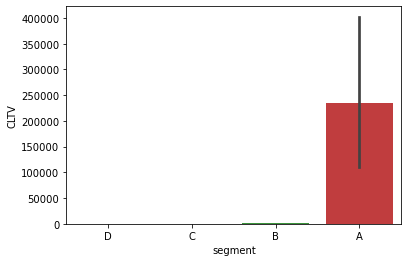

In [47]:
sns.barplot(x=cltv_df["segment"], y= cltv_df["CLTV"])

<AxesSubplot:xlabel='segment', ylabel='total_price'>

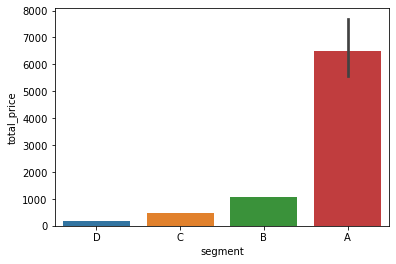

In [48]:
sns.barplot(x=cltv_df["segment"], y= cltv_df["total_price"])

<AxesSubplot:xlabel='segment', ylabel='total_transaction'>

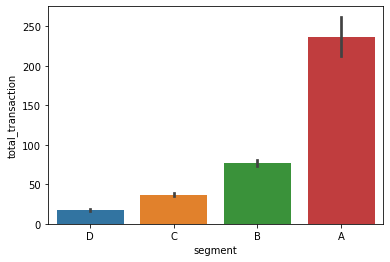

In [51]:
sns.barplot(x=cltv_df["segment"], y= cltv_df["total_transaction"])